# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
"""Import packages"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import cv2
import tensorflow as tf
import time

%matplotlib inline

In [2]:
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
### To start off let's do a basic data summary.
labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))
print(' ')
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)




dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
 
X_train shape =  (39209, 32, 32, 3)
y_train shape =  (39209,)
X_test shape =  (12630, 32, 32, 3)
y_test shape =  (12630,)
Type of X_train =  <class 'numpy.ndarray'>
Type of y_train =  <class 'numpy.ndarray'>
 
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [5]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict

import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        i4 = random.randrange(len_index)
        i5 = random.randrange(len_index)
        i6 = random.randrange(len_index)
        i7 = random.randrange(len_index)
        i8 = random.randrange(len_index)
        i9 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        index4 = pos_index[i4]
        index5 = pos_index[i5]
        index6 = pos_index[i6]
        index7 = pos_index[i7]
        index8 = pos_index[i8]
        index9 = pos_index[i9]

        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        im4 = X[index4][:][:][:]
        im5 = X[index5][:][:][:]
        im6 = X[index6][:][:][:]
        im7 = X[index7][:][:][:]
        im8 = X[index8][:][:][:]
        im9 = X[index9][:][:][:]
     
        plt.figure()
        plt.subplot(331)
        plt.imshow(im1)
        plt.subplot(332)
        plt.imshow(im2)
        plt.subplot(333)
        plt.imshow(im3)

        plt.subplot(334)
        plt.imshow(im4)
        plt.subplot(335)
        plt.imshow(im5)
        plt.subplot(336)
        plt.imshow(im6)
        
        plt.subplot(337)
        plt.imshow(im7)
        plt.subplot(338)
        plt.imshow(im8)
        plt.subplot(339)
        plt.imshow(im9)
        
        plt.show() 
    plt.close("all")
    


In [6]:
"""Organize images into dictionaries"""
class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

Current class = 0


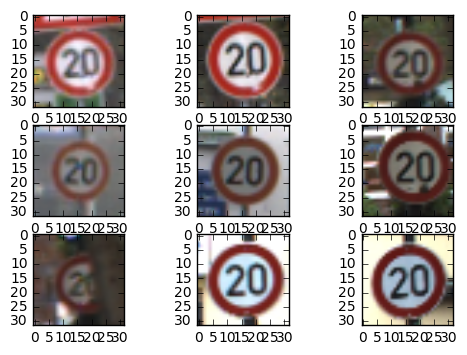

Current class = 1


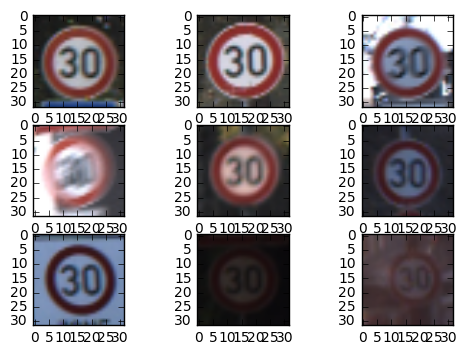

Current class = 2


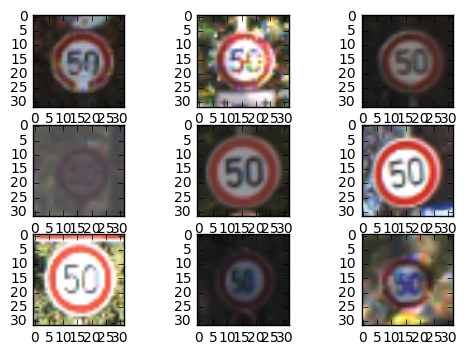

Current class = 3


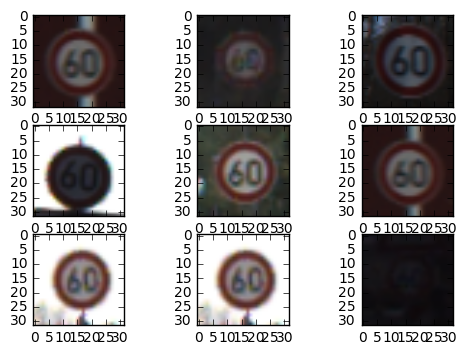

Current class = 4


KeyboardInterrupt: 

In [7]:
"""Display random images from training set"""
plot_random(X_train, class_dict_train)

In [ ]:
"""Display random images from testing set"""
plot_random(X_test, class_dict_test)

Class 00 has 0210 entries
Class 01 has 2220 entries
Class 02 has 2250 entries
Class 03 has 1410 entries
Class 04 has 1980 entries
Class 05 has 1860 entries
Class 06 has 0420 entries
Class 07 has 1440 entries
Class 08 has 1410 entries
Class 09 has 1470 entries
Class 10 has 2010 entries
Class 11 has 1320 entries
Class 12 has 2100 entries
Class 13 has 2160 entries
Class 14 has 0780 entries
Class 15 has 0630 entries
Class 16 has 0420 entries
Class 17 has 1110 entries
Class 18 has 1200 entries
Class 19 has 0210 entries
Class 20 has 0360 entries
Class 21 has 0330 entries
Class 22 has 0390 entries
Class 23 has 0510 entries
Class 24 has 0270 entries
Class 25 has 1500 entries
Class 26 has 0600 entries
Class 27 has 0240 entries
Class 28 has 0540 entries
Class 29 has 0270 entries
Class 30 has 0450 entries
Class 31 has 0780 entries
Class 32 has 0240 entries
Class 33 has 0689 entries
Class 34 has 0420 entries
Class 35 has 1200 entries
Class 36 has 0390 entries
Class 37 has 0210 entries
Class 38 has

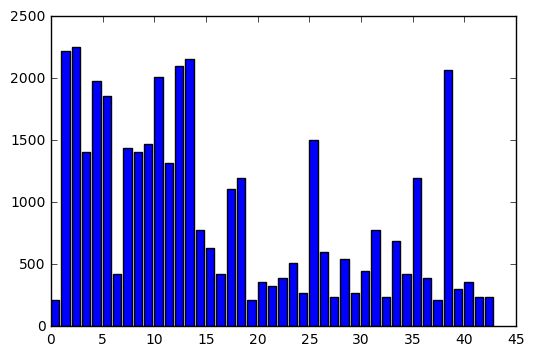

In [8]:
classes = []
num_entries = []
for key in class_dict_train:
    curr_num_entries = len(class_dict_train[key])
    print('Class %02d has %04d entries' % (key,curr_num_entries))
    classes.append(key)
    num_entries.append(curr_num_entries)

plt.bar(classes,num_entries)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [10]:
"""Define helper functions for pre-processing"""

def grayscale_singleimage(img):
    """Applies the Grayscale transform to single image.
    
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')
    
    Args:
        img: numpy array with dimensions [x,y]
    Returns
        Numpy array with dimensions [x, y]
    
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_set(x):
    print('Making grayscale')
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i,:,:,:]
        ret_images[i,:,:] = grayscale_singleimage(curr_im)
    return ret_images

def normalize_set(x):
    print('Normalizing data')
    x_shape = x.shape
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        #proc_im = cv2.normalize(src=curr_im, dst=empty_im, alpha=0.1, beta=0.9, norm_type=cv2.NORM_MINMAX)
        proc_im = cv2.normalize(src=curr_im, dst=empty_im, alpha=-1.,beta=1.,norm_type=cv2.NORM_MINMAX)
        ret_images[i][:][:] = proc_im
    return ret_images

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    y_shape = y.shape
    numel = y_shape[0]
    ret_y = np.zeros((numel, num_labels))
    for i in range(numel):
        curr_label = y[i]
        #print('Current label = ', curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print('Print one-hot encoding of label = ', curr_encoding)
        ret_y[i] = curr_encoding
    return ret_y



In [11]:
"""Preprocess data"""
# Preprocess test data
X_test_preproc = X_test
X_test_preproc = grayscale_set(X_test_preproc)
X_test_preproc = normalize_set(X_test_preproc)
test_data = X_test_preproc

# Preprocess training data
X_train_preproc = X_train
X_train_preproc = grayscale_set(X_train_preproc)
X_train_preproc = normalize_set(X_train_preproc)
train_data = X_train_preproc

"""Print data info"""
print(' ')
print('Data info')
print('Shape of training data = ', train_data.shape)
print('Shape of test data = ', test_data.shape)

train_labels = y_train
test_labels = y_test
print('y_train shape = ', y_train.shape)
print('y_test shape = ', y_test.shape)


train_labels = make_one_hot_encoding(y_train, 43)
test_labels = make_one_hot_encoding(y_test, 43)


# Must make the one-hot encoding float32 so values can be multiplied agains features in TensorFlow, which are float 32
# This is maddening!!!!! I spent HOURS chasing this down. My values were initially in float64, which didn't work.
# The model would train and not through warnings or errors, but accuracy never rose above 10%
# After re-casting in float32, everything worked just fine.
# Wish TensorFlow would at least give a warning if input is not in float32.
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)

"""Expand data to have extra channel in order to be compatible with TensorFlow"""
if len(train_data.shape) != 4:
    print('Expanding data')
    train_data = np.expand_dims(np.array(train_data),3)

if len(test_data.shape) != 4:
    print('Expanding data')
    test_data = np.expand_dims(np.array(test_data),3)

print('Train data shape = ', train_data.shape)
print('Test data shape = ', test_data.shape)

Making grayscale
Normalizing data
Making grayscale
Normalizing data
 
Data info
Shape of training data =  (39209, 32, 32)
Shape of test data =  (12630, 32, 32)
y_train shape =  (39209,)
y_test shape =  (12630,)
Making one hot encoding
Making one hot encoding
Expanding data
Expanding data
Train data shape =  (39209, 32, 32, 1)
Test data shape =  (12630, 32, 32, 1)


### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:**
Preprocessing occurred in 4 steps: Grayscale -> Normalize -> One-hot encoding -> Expand dimensions.

Grayscale: Convert each image in data set from color to grayscale. Note, this changes data from numpy array with dimensions (n, 32, 32, 3) to (n, 32, 32).

Normalize: Change range of grayscale images from (0,256) to (-1.0, +1.0)

One-hot encoding: Rather than integer or float labels for each data type (e.g. 1, 1.0, 3, 3.0), convert to a more binary representation so matrix math works (e.g. 3 becomes [0,0,1,0], 4 becomes [0,0,0,1]). The one-hot encoded version must by numpy array. This step is relatively simple. However there is a completely maddening part of this! TensorFlow expects the data type to be float32 so it can multiply by other float32 values internally. If you don't cast it as float32 and instead leave it cast as float64 (which many methods will do), TensorFlow will accept it and not through an error but all the optimization doesn't work well. I had my one-hot encoding initially cast as float64 and could never get accuracy to exceed 10% no matter how many epochs. When I recast as float32, I got better than 90% accuracy.

This particular issue cost me many, many hours and isn't well documented. I will TensorFlow or Udacity would have been more proactive on this.

Expand dimensions: TensorFlow expects color channels for images. So, it won't accept numpy arrays with dimensions (n, 32, 32). Expand this to (n, 32, 32, 1) so it works, even though the last dimension is meaningless in terms of information.



In [12]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

"""Make a validation set from some of training data"""
print('Train shape before validation split', train_data.shape, train_labels.shape)
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels,test_size=0.05, random_state=101)
print('Train shape after validation split', train_data.shape, train_labels.shape)

Train shape before validation split (39209, 32, 32, 1) (39209, 43)
Train shape after validation split (37248, 32, 32, 1) (37248, 43)


In [13]:
"""Report General statistics on training, testing, validation data sets"""
# Want training, test split to be 80%, 20% of total data
# Of the remaining training data, want training, validation split to be 80%, 20%

num_train = train_labels.shape[0]
num_test = test_labels.shape[0]
num_validation = validation_labels.shape[0]
total_samples = num_train + num_test + num_validation

print('Testing as percentage of whole = %f' % (num_test/total_samples))
print('Training as percentage of whole = %f' % (num_train/total_samples))
print('Validation as percentage of whole = %f' % (num_validation/total_samples))

Testing as percentage of whole = 0.243639
Training as percentage of whole = 0.718532
Validation as percentage of whole = 0.037829


In [14]:
print('Train data shape = ', train_data.shape)
print('Validation data shape = ', validation_data.shape)
print('Test data shape = ', test_data.shape)

Train data shape =  (37248, 32, 32, 1)
Validation data shape =  (1961, 32, 32, 1)
Test data shape =  (12630, 32, 32, 1)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I left 'test' as it was imported, which is ~25% of total data. For the 'Training' set, I split off 5% of the data. The ideal split would be closer to 20% 'Test' and 80% 'Training'. Of the 'Training' data, split off 5% for 'Validation'.

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [16]:
"""CNN helper functions"""
def conv2d(x, W, b, strides=1):
    return tf.nn.relu6(tf.nn.bias_add(tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
                                                  padding='SAME'),b))

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1, k=2)
    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2, k=2)
    conv2 = tf.nn.dropout(conv2, dropout)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3, k=2)
    conv3 = tf.nn.dropout(conv3, dropout)

    # Layer 4
    #conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    #conv4 = maxpool2d(conv4, k=2)
    #conv4 = tf.nn.dropout(conv4, dropout)
    
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    #val = weights['fully_connected'].get_shape().as_list()[0]
    #print('Val = ', val)
    #print('Weights fully connected = ', weights['fully_connected'])
    #print('Biases fully connected = ', biases['fully_connected'])
    
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected'].get_shape().as_list()[0]])
    #fc1 = tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected'])
    #fc1 = tf.nn.tanh(fc1)    
    fc1 = tf.nn.relu6(tf.add(tf.matmul(fc1, weights['fully_connected']), biases['fully_connected']))
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout) # Apply Dropout

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [17]:
"""Define neural network architecture"""
n_input = 1024  # traffic sign data input (Shape: 32*32 = 1024)
n_classes = 43  # total number of traffic sign classes
num_channels = 1 # Number of color channels in a image

layer_width = {
    'layer_1': 100, #100
    'layer_2': 150, #150
    'layer_3': 64, #64
    #'layer_4': 256,
    'fully_connected': 512 #512
    }

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, layer_width['layer_1'] outputs
    'layer_1': tf.Variable(tf.random_normal(
        [3, 3, num_channels, layer_width['layer_1']])),
    
    # 5x5 conv, layer_width['layer_1'] inputs, layer_width['layer_2'] outputs
    'layer_2': tf.Variable(tf.random_normal(
        [4, 4, layer_width['layer_1'], layer_width['layer_2']])),
    
    # 5x5 conv, layer_width['layer_2'] inputs, layer_width['layer_3'] outputs
    'layer_3': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_2'], layer_width['layer_3']])),

    #'layer_4': tf.Variable(tf.random_normal(
     #   [3, 3, layer_width['layer_3'], layer_width['layer_4']])),
    
    # fully connected, 1024 inputs, layer_width['fully_connected'] outputs
    'fully_connected': tf.Variable(tf.random_normal(
        [1024, layer_width['fully_connected']])),
    
    # output, layer_width['fully_connected'] inputs, n_classes outputs
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

print('Layer 1 output taps = ', layer_width['layer_1'])
print('Layer 2 output taps = ', layer_width['layer_2'])
print('Layer 3 output taps = ', layer_width['layer_3'])

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    #'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}



Layer 1 output taps =  100
Layer 2 output taps =  150
Layer 3 output taps =  64


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
TBD

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [19]:
# Set up variables for logging and displaying data
time_per_training_epoch = []
training_accuracy_validation = []
training_accuracy_testing = []
cost_list = []
stat_filename = 'save.p'

"""Initialize or load pickled file containing status data on training"""
    
def initialize_stat_file(stat_filename):
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': [], 
                    'training_accuracy_validation': [], 
                    'cost_list': []}
    pickle.dump(data_to_save, open( stat_filename, "wb" ))

def load_stats_from_file(stat_filename):
    print('Loading stats from file')
    data_to_save = pickle.load(open( stat_filename, "rb" ))
    time_per_training_epoch = data_to_save['time_per_training_epoch']
    training_accuracy_validation = data_to_save['training_accuracy_validation']
    cost_list = data_to_save['cost_list']
    
def save_stats_to_file(stat_filename):
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': time_per_training_epoch, 
                    'training_accuracy_validation': training_accuracy_validation, 
                    'cost_list': cost_list}
    pickle.dump(data_to_save, open( stat_filename, "wb" ))

def report_stats_from_file(stat_filename):
    print('Reporting from file to make plot')
    
    """Retrieve data"""
    unpickled_data = pickle.load( open(stat_filename, "rb" ) )
    time_per_training_epoch = unpickled_data['time_per_training_epoch']
    training_accuracy_validation = unpickled_data['training_accuracy_validation']
    cost_list = unpickled_data['cost_list']

    """Plot and save fig for time per training epoch"""
    fig_savename = 'time_per_training_epoch.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(time_per_training_epoch)), time_per_training_epoch, color = 'b')
    plt.ylabel('Time per training epoch (sec)')
    plt.title('Training time per epoch', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    """Plot and save fig for cost"""
    fig_savename = 'cost_list.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(cost_list)), cost_list, color = 'b')
    plt.ylabel('Cost_list')
    plt.title('Cost_list', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    """Plot and save fig for validation model accuracy"""
    fig_savename = 'training_accuracy_validation.png'
    fig = plt.figure()
    curr_plot1 = plt.plot(range(len(training_accuracy_validation)), training_accuracy_validation, color = 'b')
    plt.ylabel('Training accuracy validation')
    plt.title('Training accuracy validation', fontsize = 10)
    plt.show()
    curr_dir = os.getcwd()
    fig.savefig(fig_savename)
    fig.clf()

    print('Done reporting stats')
    plt.close("all")
    


In [20]:
logfile = 'log.txt'
f = open(logfile,'w')
f.write('Log file for training session\n') # python will convert \n to os.linesep
f.close() # you can omit in most cases as the destructor will call it

initialize_stat_file(stat_filename)
load_stats_from_file(stat_filename)
save_stats_to_file(stat_filename)
#report_stats_from_file(stat_filename)

Saving stats to file
Loading stats from file
Saving stats to file


In [21]:
learning_rate = 0.0001
batch_size = 128
training_epochs = 20
num_channels = 1
dropout = 0.5



# tf Graph input
x = tf.placeholder("float", [None, 32, 32, num_channels])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Construct the model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate the model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
   
# Initializing the variables
init = tf.initialize_all_variables()

saver = tf.train.Saver() # Object to save and restore variables.

print(train_data.shape, validation_data.shape, test_data.shape)




(37248, 32, 32, 1) (1961, 32, 32, 1) (12630, 32, 32, 1)


In [22]:
model_savename = 'model-checkpoint1'
model_savename_checkpoint = 'model-checkpoint1.meta'

In [ ]:
restore_model_for_continued_work = 0
initialize_stat_file(stat_filename)

# Launch the graph
with tf.Session() as sess:
    print('Beginning to train')
    sess.run(init)
    
    """Restore saved model for continued work"""
    if restore_model_for_continued_work == 1:
        print('Restoring model')
        start_time_restore = time.time()
        saver = tf.train.import_meta_graph(model_savename)
        saver.restore(sess, model_savename+'.meta')
        all_vars = tf.trainable_variables()
        elapsed_time = time.time() - start_time_restore
        print('Time to restore model (sec) = ', int(elapsed_time))

    # Training cycle
    for epoch in range(training_epochs):
        print(' ')
        print('Starting epoch %02d' % epoch)
        epoch_start_time = time.time()
        total_batch = int(math.ceil(len(train_data)/batch_size))
        print ('Number of batches to process = %0000d' % total_batch)
        with open(logfile, "a") as myfile:
            str_to_write = 'Batches per epoch, batch size, total_samples in training set: '
            str_to_write += str(total_batch) + ' ' + str(batch_size) +  ' ' + str(total_samples) + '\n'
            myfile.write(str_to_write)     
        # Loop over all batches
        print('Processing batches. Not yet saving.')
        
        for i in range(total_batch):
            batch_start = i * batch_size;
            batch_x = train_data[batch_start:batch_start+batch_size]
            batch_y = train_labels[batch_start:batch_start+batch_size]
            #start = i * batch_size
            #stop  = i * batch_size + batch_size
            #batch_x = training_data[start:stop, :, :]
            #batch_y = training_labels[start:stop]
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            #acc = 0
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            #acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            with open(logfile, "a") as myfile:
                str_to_write = 'Minibatch accuracy (epoch, iteration, accuracy): ' + str(epoch) + ' ' + str(i) + ' ' + str(acc) + '\n'
                myfile.write(str_to_write)            
        print('Done processing batches. Checking accuracy and logging epoch results')
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        accuracy_validation = sess.run(accuracy, feed_dict={x: validation_data, y: validation_labels, keep_prob: 1.})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)," validation accuracy=","{:,.3f}".format(accuracy_validation))
        epoch_stop_time = time.time()
        elapsed_time = epoch_stop_time - epoch_start_time
        print('Time to process epoch (sec) = ', int(elapsed_time))

        # Load stats, append, values, save, and report
        load_stats_from_file(stat_filename)        
        cost_list.append(c)        
        time_per_training_epoch.append(int(elapsed_time))
        training_accuracy_validation.append(accuracy_validation)                
        save_stats_to_file(stat_filename)
    print("Optimization Finished!")

    # Save model
    save_path = saver.save(sess, model_savename)
    print("Model saved in file: %s" % save_path)
    
    # Calculate accuracy
    print(' ')
    print(' ')
    print("Accuracy against test set:",accuracy.eval({x: test_data, y: test_labels, keep_prob: 1.}))

Saving stats to file
Beginning to train
 
Starting epoch 00
Number of batches to process = 291
Processing batches. Not yet saving.
Done processing batches. Checking accuracy and logging epoch results
Epoch: 0001 cost= 90.928497314  validation accuracy= 0.045
Time to process epoch (sec) =  602
Loading stats from file
Saving stats to file
 
Starting epoch 01
Number of batches to process = 291
Processing batches. Not yet saving.
Done processing batches. Checking accuracy and logging epoch results
Epoch: 0002 cost= 78.734283447  validation accuracy= 0.045
Time to process epoch (sec) =  610
Loading stats from file
Saving stats to file
 
Starting epoch 02
Number of batches to process = 291
Processing batches. Not yet saving.
Done processing batches. Checking accuracy and logging epoch results
Epoch: 0003 cost= 77.381042480  validation accuracy= 0.049
Time to process epoch (sec) =  600
Loading stats from file
Saving stats to file
 
Starting epoch 03
Number of batches to process = 291
Processi

Reporting from file to make plot


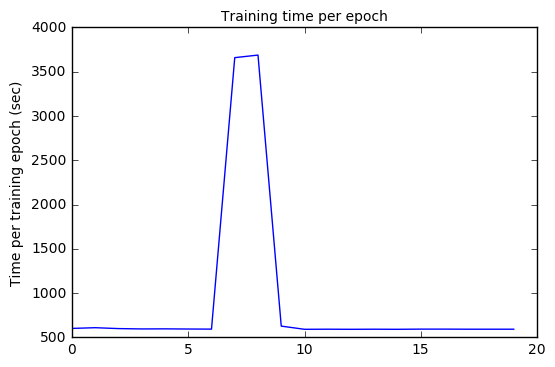

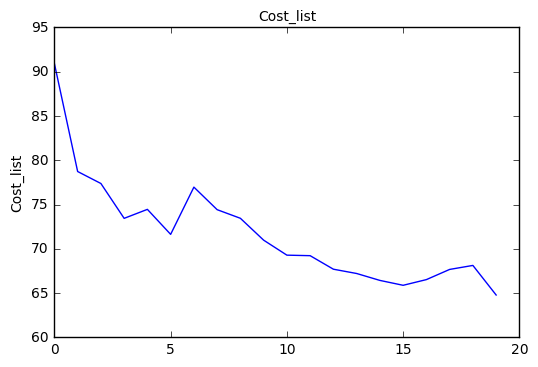

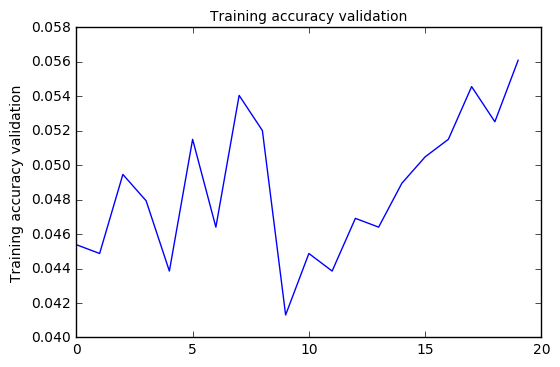

Done reporting stats


In [ ]:
report_stats_from_file(stat_filename)        
plt.close("all")

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
TBD.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
TBD.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
"""Load the trained model from file"""
restore_model_for_continued_work = 1

if restore_model_for_continued_work == 1:
    with tf.Session() as sess:

        saver = tf.train.import_meta_graph(model_savename+'.meta')
        saver.restore(sess, model_savename)
        all_vars = tf.trainable_variables()

In [ ]:
from scipy import ndimage, misc

read_dir = '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images'
files_png = []
for file in os.listdir(read_dir):
    if 'png' in file:
        files_png.append(os.path.join(read_dir, file))
print(files_png)

images = np.zeros((len(files_png), 32, 32, 3), 'uint8')

for i in range(len(files_png)):
    image = ndimage.imread(files_png[i], mode="RGB")
    image_resized = misc.imresize(image, (32, 32))
    images[i,:,:,:] = image_resized

print(images.shape)

['/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t1.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t10.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t11.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t12.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t2.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t3.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifier/Jupyter_work/test-images/t4.png', '/Users/blakejacquot/Desktop/temp2/Udacity_SelfDrivingCar/Term1/Project2_TrafficSignClassifie

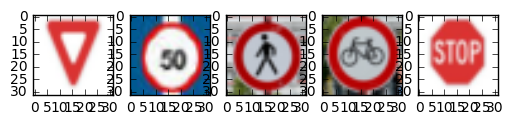

In [ ]:
five_candidates = images[0:5,:,:,:]

plt.figure()
for i in range(len(five_candidates)):
    plt.subplot(100+50+i+1)
    plt.imshow(five_candidates[i])

plt.show()     
    
#plt.close("all")

In [ ]:
# Preprocess the data

X_five_candidates_preproc = five_candidates
X_five_candidates_preproc = grayscale_set(X_five_candidates_preproc)
X_five_candidates_preproc = normalize_set(X_five_candidates_preproc)

"""Expand data to have extra channel in order to be compatible with TensorFlow"""
if len(X_five_candidates_preproc.shape) != 4:
    print('Expanding data')
    X_five_candidates_preproc = np.expand_dims(np.array(X_five_candidates_preproc),3)

print(X_five_candidates_preproc.shape)


Making grayscale
Normalizing data
Expanding data
(5, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
TBD

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


In [ ]:
num_el = 5
predicted_classes = []

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(model_savename+'.meta')
    saver.restore(sess, model_savename)
    for i in range(num_el):
        curr_im = X_five_candidates_preproc[i,:,:,:]
        curr_im = np.expand_dims(curr_im, axis=0)
        curr_predicted_class = sess.run(tf.argmax(logits, 1), feed_dict={x:curr_im,keep_prob: dropout})
        predicted_classes.append(int(curr_predicted_class))

[1, 10, 4, 34, 10]
 
 
Showing predicted class and images
Top row, left is image to predict
Bottom row is 3 random images of predicted class from training set
Predicted class =  1


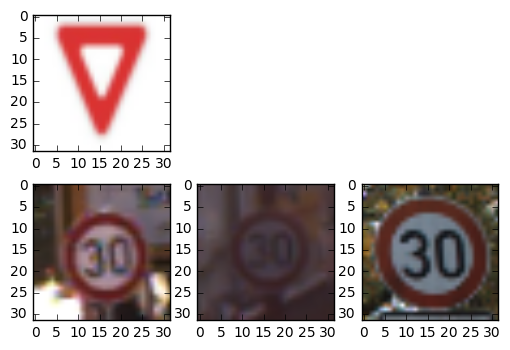

 
Showing predicted class and images
Top row, left is image to predict
Bottom row is 3 random images of predicted class from training set
Predicted class =  10


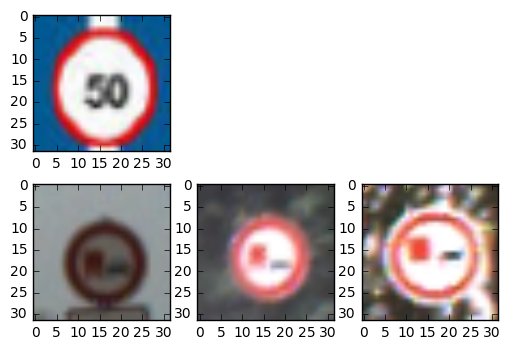

 
Showing predicted class and images
Top row, left is image to predict
Bottom row is 3 random images of predicted class from training set
Predicted class =  4


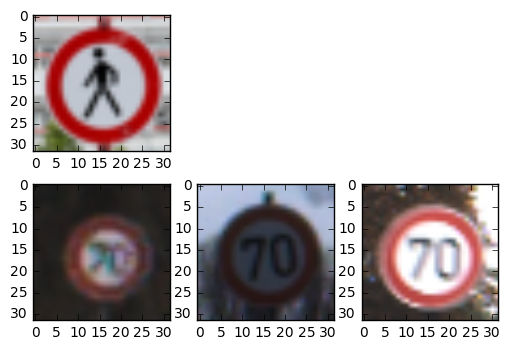

 
Showing predicted class and images
Top row, left is image to predict
Bottom row is 3 random images of predicted class from training set
Predicted class =  34


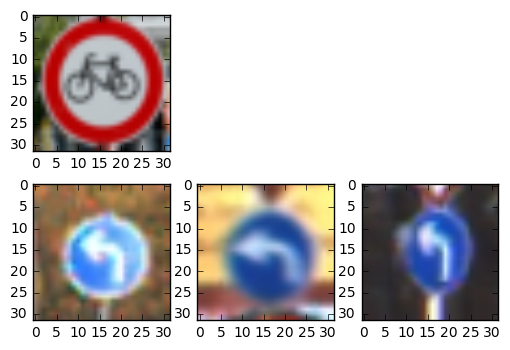

 
Showing predicted class and images
Top row, left is image to predict
Bottom row is 3 random images of predicted class from training set
Predicted class =  10


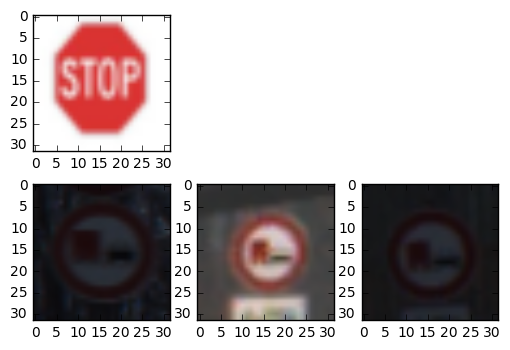

In [ ]:
print(predicted_classes)
print(' ')
for i in range(len(predicted_classes)):
    prediction = predicted_classes[i]
    curr_im_to_predict = five_candidates[i]
    position_index = class_dict_train[prediction]
    len_index = len(position_index)
    i1 = random.randrange(len_index)
    i2 = random.randrange(len_index)
    i3 = random.randrange(len_index)    
    index1 = position_index[i1]
    index2 = position_index[i2]
    index3 = position_index[i3]
    im1 = X_train[index1][:][:][:]
    im2 = X_train[index2][:][:][:]
    im3 = X_train[index3][:][:][:]
    
    print(' ')
    print('Showing predicted class and images')
    print('Top row, left is image to predict')
    print('Bottom row is 3 random images of predicted class from training set')
    print('Predicted class = ', predicted_classes[i])
    plt.figure()
    plt.subplot(231)
    plt.imshow(curr_im_to_predict)
    plt.subplot(234)
    plt.imshow(im1)
    plt.subplot(235)
    plt.imshow(im2)
    plt.subplot(236)
    plt.imshow(im3)
    plt.show() 

    
    
    
    
    

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
TBD

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

top_classes = []
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(model_savename)
    saver.restore(sess, model_savename+'.meta')
    for i in range(num_el):
        curr_im = X_five_candidates_preproc[i,:,:,:]
        curr_im = np.expand_dims(curr_im, axis=0)
        top_classes = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:curr_im})
        print(top_classes)
        print(' ')
        
        

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
TBD

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
TBD

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.